In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [70]:
df = sns.load_dataset("diamonds")
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [71]:
df["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [72]:
df["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [73]:
df["clarity"].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

<Axes: >

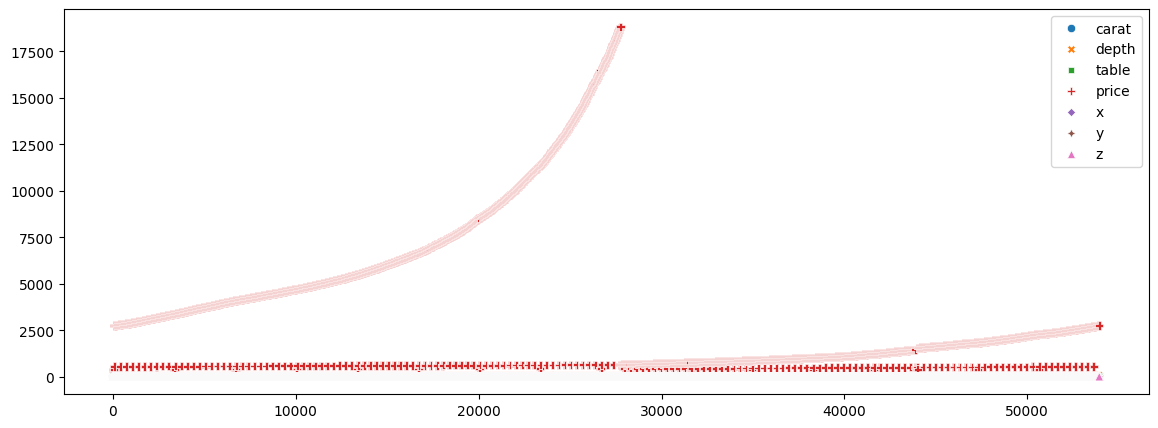

In [74]:
plt.figure(figsize=(14,5))
sns.scatterplot(df)

**cut**

<Axes: xlabel='cut', ylabel='price'>

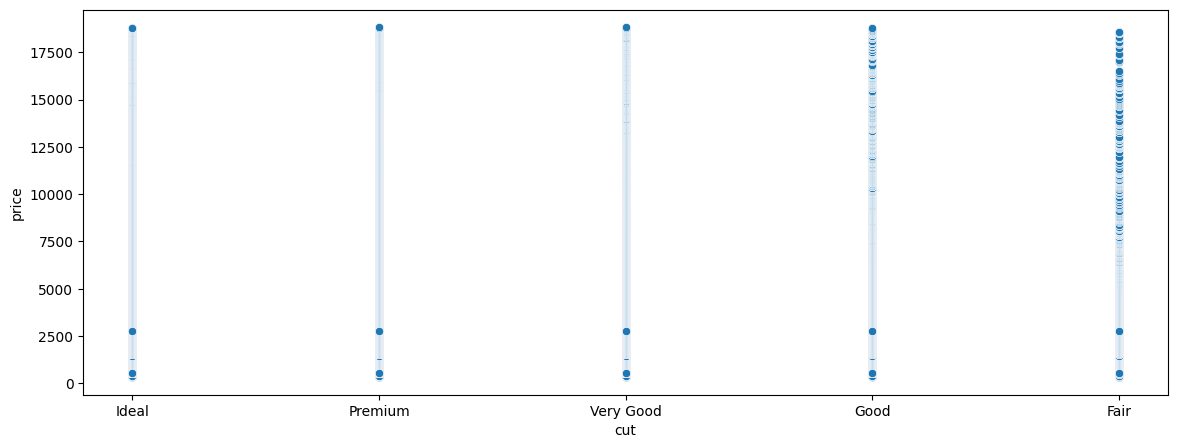

In [75]:
plt.figure(figsize=(14,5))
sns.scatterplot(x=df["cut"],y=df["price"])

In [76]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [77]:
df_cut = df.groupby("cut")
df_cut[["price"]].mean()

,price
cut,
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891
Good,3928.864452
Fair,4358.757764


<Axes: xlabel='cut', ylabel='price'>

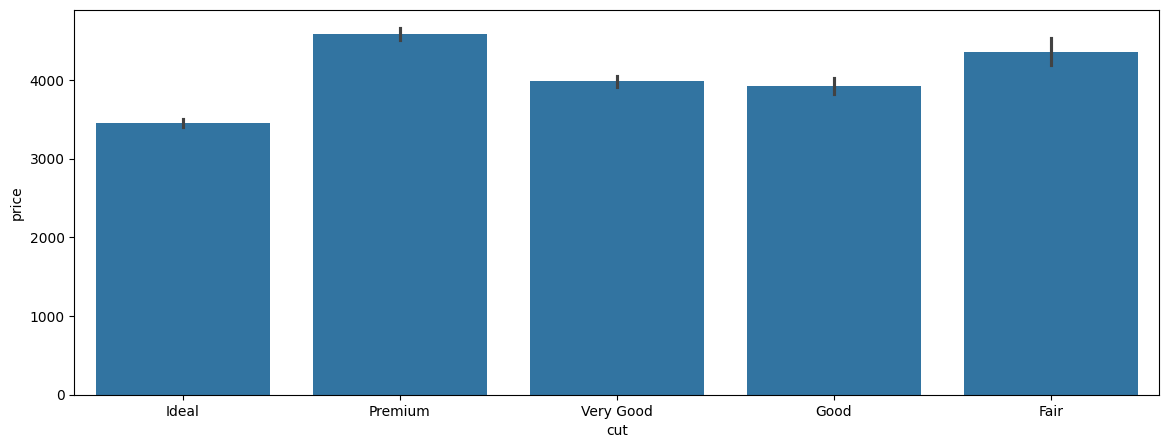

In [78]:
plt.figure(figsize=(14,5))
sns.barplot(x=df["cut"],y=df["price"])

Text(0, 0.5, 'Frequency')

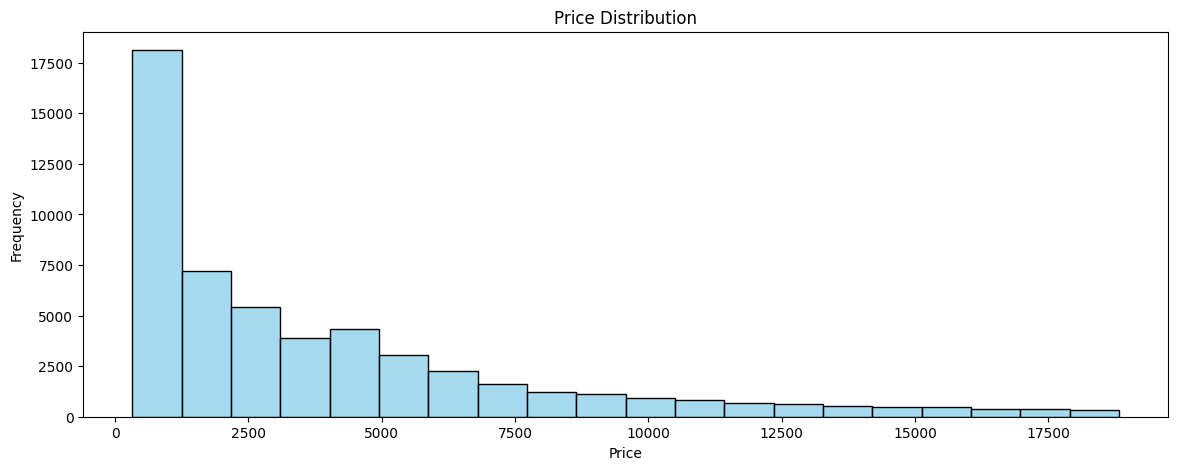

In [79]:
plt.figure(figsize=(14,5))
sns.histplot(data=df, x=df["price"], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

<Axes: xlabel='cut', ylabel='price'>

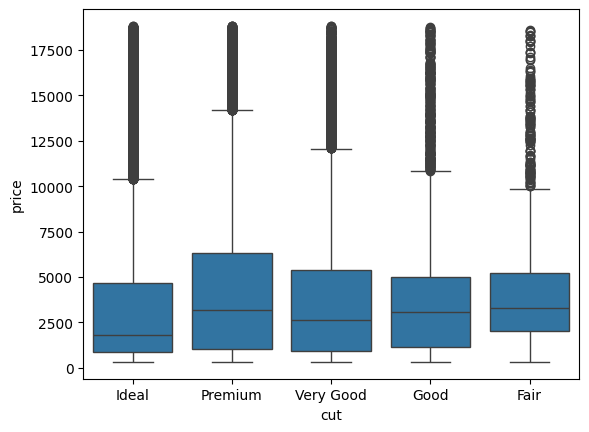

In [80]:
sns.boxplot(data=df, x='cut', y='price')

**color**

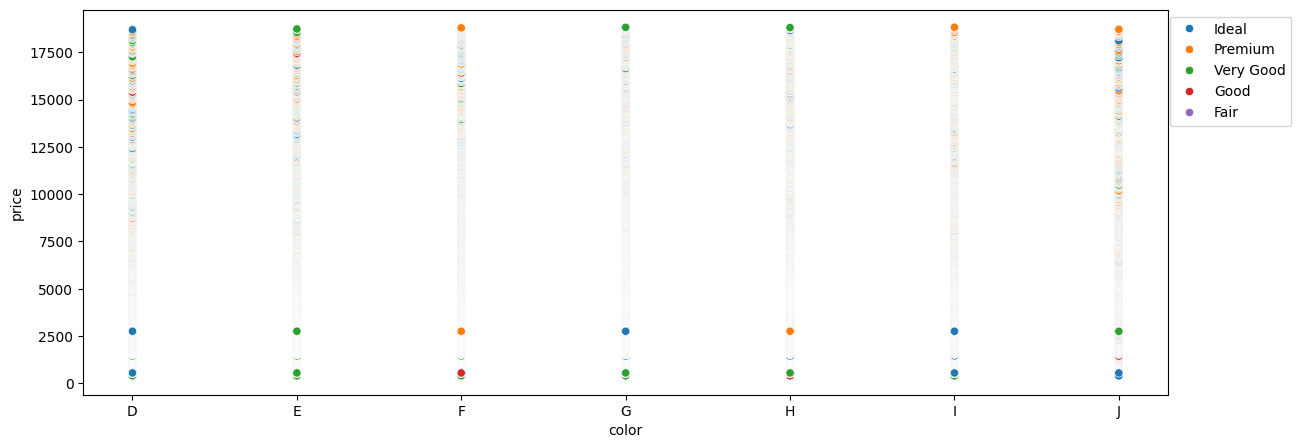

In [64]:
plt.figure(figsize=(14,5))
sns.scatterplot(x= df["color"],y=df["price"],hue=df["cut"])
plt.legend(loc="upper right", bbox_to_anchor=(1.12, 1))

In [65]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [83]:
df = pd.get_dummies(df, columns=["cut","color","clarity"])
df.head(3)

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
x = df.drop("price",axis=1)
y = df["price"]

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=5)

In [86]:
model = LinearRegression().fit(x_train, y_train)

In [87]:
model.score(x_test,y_test)

0.9184481155057763

In [89]:
y_pred = model.predict(x_test)

<Axes: xlabel='price'>

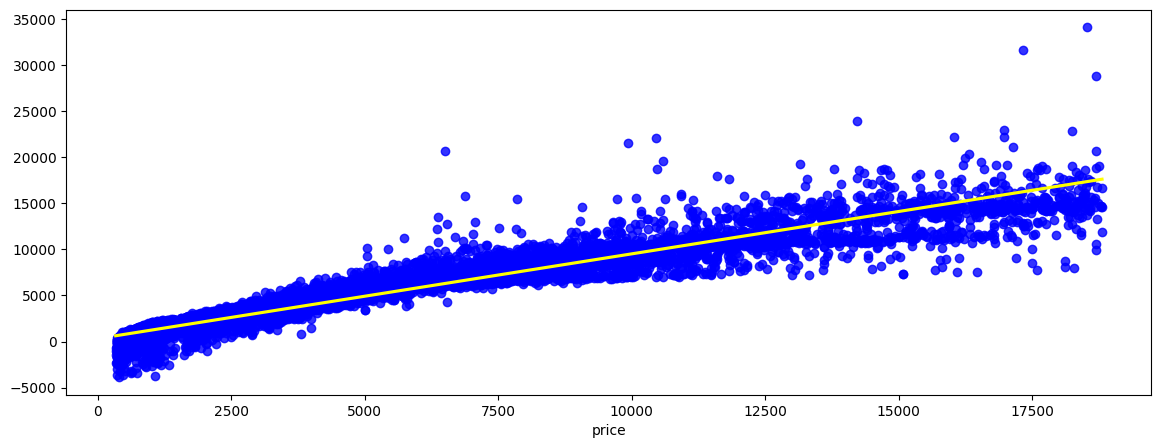

In [98]:
plt.figure(figsize=(14,5))
sns.regplot(x=y_test,y=y_pred,scatter_kws={'color': 'b', 'marker': 'o'}, line_kws={'color': 'yellow'})

In [100]:
mean_absolute_error(y_test,y_pred)

735.8991972563844

In [99]:
mean_absolute_percentage_error(y_test,y_pred)

0.38908647713206107

In [101]:
mean_squared_error(y_test,y_pred)

1277672.6000845407